# Using the Keras Functional API

Let us create another model, which will improve upon the sequential model we made in the last notebook by using the *Keras functional API*. We shall use the same *Boston Housing* dataset for this purpose, in order to compare.

### Import Necessary Libraries

In [20]:
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.constraints import UnitNorm
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np

### Prepare the Dataset

We load the dataset and create train and test sets.

In [21]:
(xtrain, ytrain), (xtest, ytest)=boston_housing.load_data()

### Create a Simple Model

Now we create the model by using the Keras functional API. Here each layer is passed as a parameter to the next, so that when the model is finally created, it can trace backwards through the layers.

In [22]:
def createModel(input_shape):
  # input layer
  input=Input(shape=(input_shape,), name='input')

  # hidden layers
  h1=Dense(14, activation='relu', name='h1')(input)
  h2=Dense(6, activation='relu', name='h2')(h1)

  # output layer
  op=Dense(1, activation='linear', name='op')(h2)

  # create the model
  model=Model(inputs=input, outputs=op)
  return model

### Add Regularisation

Next we add *regularisation*. *Regularisation* is a means of controlling the complexity of a model without changing its structure. There are different types of regularisation, such as *L1 and L2 regularisation*. Learn more about L1 and L2 regularisation [here](https://medium.com/analytics-vidhya/regularization-understanding-l1-and-l2-regularization-for-deep-learning-a7b9e4a409bf).

*L2 regularization*, also known as *Ridge Regression*, is a technique used to prevent overfitting in machine learning models. It works by adding a penalty term to the loss function, which is proportional to the sum of the squared values of the model parameters (weights). This penalty discourages the model from assigning too much importance to any single feature, leading to a more generalized model.

Let us change the above function `createModel()` to include regularisation. We do this by adding a `kernel_regularizer` parameter to each hidden layer in the model. We set the regulariser parameter to a default value of 0.1, which may be changed based on the model's response.

In [23]:
def createModel2(input_shape, l2_param=0.1):
  # input layer
  input=Input(shape=(input_shape,), name='input')

  # hidden layers
  h1=Dense(14, activation='relu', kernel_regularizer=l2(l2_param), name='h1')(input)
  h2=Dense(6, activation='relu', kernel_regularizer=l2(l2_param), name='h2')(h1)

  # output layer
  op=Dense(1, activation='linear', name='op')(h2)

  # create the model
  model=Model(inputs=input, outputs=op)
  return model

### Add Batch Normalisation

*Batch normalisation* is a technique used to improve the training of deep neural networks. It helps by normalising the inputs of each layer so that they have a mean of zero and a standard deviation of one. This normalisation is done for each mini-batch of data during training.

The batch normalisation is added in between 2 hidden layers. Since we are adding the normalisation, there is no need for a bias term within the hidden layers(the normalisation will take care of it). Hence `use_bias` is set to `False` within the hidden layer. After adding normalisation, we add the activation function. Hence we get:

In [24]:
def createModel3(input_shape, l2_param=0.1):
  # input layer
  input=Input(shape=(input_shape,), name='input')

  # hidden layers
  h1=Dense(14, kernel_regularizer=l2(l2_param), use_bias=False, name='h1')(input)

  #add batch normalisation
  b1=BatchNormalization(name='batchnorm1')(h1)

  # add activation function
  a1=Activation("relu", name="a1")(b1)

  # do the same for the second hidden layer
  h2=Dense(6, kernel_regularizer=l2(l2_param), use_bias=False, name='h2')(a1)
  b2=BatchNormalization(name='batchnorm2')(h2)
  a2=Activation("relu", name="a2")(b2)

  # output layer
  op=Dense(1, activation='linear', name='op')(h2)

  # create the model
  model=Model(inputs=input, outputs=op)
  return model

### Compile the Model

Now let us compile this improved model, using the `adam` optimiser and *mean squared error* to calculate loss.(`mse`).

In [25]:
model=createModel3(xtrain.shape[1])
model.compile(optimizer='adam', loss='mse')

### Add Early Stopping

Now, for the final improvement, let us add an *early stopping* callback.

In early stopping, the model's performance on the validation dataset is monitored for improvement. If the model does not improve from one epoch to the next, the training is halted. This helps to prevent overfitting of the model, as well as save time and computational resources.

Let us create an early stopping callback which monitors *validation loss*, and has a `patience` parameter of 15. ie, if 15 epochs occur with no improvement in `val_loss`, then training is halted. Once stopping occurs, the weights associated with the best *validation loss* are restored. Hence `restore_best_weights` is set to `True`.

In [26]:
es=EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

### Fit the Model

Now we fit the model to the dataset, this time including a *validation split* of 0.2.

In [27]:
history=model.fit(xtrain, ytrain, epochs=1000, batch_size=10, shuffle=True, validation_split=0.2, callbacks=[es])

Epoch 1/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 573.4536 - val_loss: 258.5605
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 534.2944 - val_loss: 381.4660
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 500.6956 - val_loss: 449.6939
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 417.4062 - val_loss: 476.4087
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390.7704 - val_loss: 467.7509
Epoch 6/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 361.1611 - val_loss: 431.1419
Epoch 7/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 295.2069 - val_loss: 374.1847
Epoch 8/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192.7801 - val_loss: 314.3839
Epoch 9/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 177.1406 - val_loss: 254.3159
Epoch 10/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.5702 - val_loss: 195.6550
Epoch 11/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.6580 - val_loss: 149.3342
Epoch 12/

Notice that though we specified the model to run 1000 epochs, its stops at epoch 62. This is the effect of the *early stopping* callback.

Plot the training vs validation *mean squared error*.

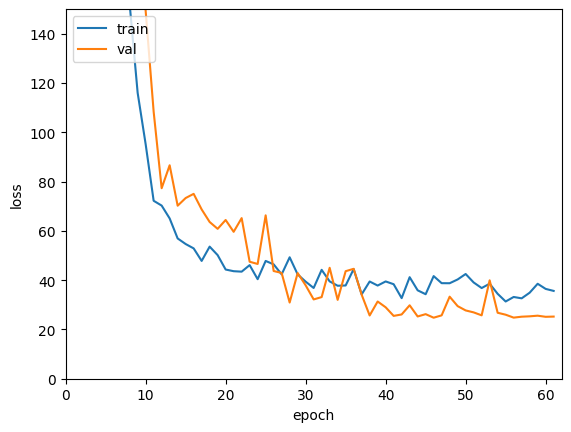

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.gca().set_xlim(0, len(history.history['loss']))
plt.gca().set_ylim(0, 150)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test the Model

Now let us test the model.

In [29]:
ypred=model.predict(xtest)
mse=np.mean((ypred-ytest)**2)
print("MSE: ", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MSE:  128.21431302627477


Notice that the model performance has improved from the last, simple model. the mean squared error has dropped from 152 to 128. With more optimisation and improvement of course, this may be further reduced.

### Sources

*   Infosys SpringBoard
*   Medium.com
*   Bing Copilot